In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
adv=pd.read_csv("advertising.csv")
housing =pd.read_csv("Housing.csv")
aviation=pd.read_csv("faa_ai_prelim.csv")

In [ ]:
adv.info()
print('\n\n\n')
housing.info()
print('\n\n\n')
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 

In [ ]:
adv.sample(10)

,TV,Radio,Newspaper,Sales
150,280.7,13.9,37.0,16.1
60,53.5,2.0,21.4,8.1
125,87.2,11.8,25.9,10.6
179,165.6,10.0,17.6,17.6
2,17.2,45.9,69.3,12.0
101,296.4,36.3,100.9,23.8
169,284.3,10.6,6.4,20.0
77,120.5,28.5,14.2,14.2
86,76.3,27.5,16.0,12.0
45,175.1,22.5,31.5,16.1


In [ ]:
housing.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
333,3920000,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished
360,3710000,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
143,5600000,4800,5,2,3,no,no,yes,yes,no,0,no,unfurnished
351,3780000,3600,2,1,1,yes,no,no,no,no,0,no,semi-furnished
474,2975000,4352,4,1,2,no,no,no,no,no,1,no,unfurnished
224,4760000,10240,2,1,1,yes,no,no,no,yes,2,yes,unfurnished
136,5740000,5400,4,2,2,yes,no,no,no,yes,2,no,unfurnished
314,4095000,4040,2,1,2,yes,no,no,no,no,1,no,semi-furnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
54,7350000,6000,3,2,2,yes,yes,no,no,yes,1,no,semi-furnished


In [ ]:
aviation.sample(10)

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
50,No,16-FEB-16,15-FEB-16,16:08:00Z,CHANTILLY,Virginia,NaN,"AIRCRAFT ON TAXI COLLIDED WITH A VEHICLE, WASH...",Incident,FAA Washington FSDO-27,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
12,No,17-FEB-16,14-FEB-16,20:21:00Z,ELMIRA,New York,NaN,"AIRCRAFT GEAR COLLAPSED ON LANDING, ELMIRA, NY",Incident,FAA Rochester FSDO-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,No,16-FEB-16,13-FEB-16,01:40:00Z,FORT SMITH,Arkansas,NaN,AIRCRAFT ON TAXI WING STRUCK THE PAVEMENT AND ...,Incident,FAA Little Rock FSDO-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,No,09-FEB-16,09-FEB-16,02:00:00Z,SANTA BARBARA,California,NaN,AIRCRAFT FORCE LANDED IN THE WETLAND/SLOUGH AR...,Accident,FAA Van Nuys FSDO-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Yes,12-FEB-16,12-FEB-16,01:00:00Z,PETALUMA,California,NaN,"AIRCRAFT ON LANDING THE GEAR COLLAPSED, PETALU...",Incident,FAA Oakland FSDO-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Yes,16-FEB-16,13-FEB-16,21:10:00Z,ANCHORAGE,Alaska,NaN,"AIRCRAFT ON TAKEOFF STRUCK A TAXIWAY SIGN, ANC...",Incident,FAA Anchorage FSDO-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,08-FEB-16,05-FEB-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,No,18-FEB-16,17-FEB-16,15:30:00Z,FERNANDINA BEACH,Florida,NaN,"AIRCRAFT, LSA PARADISE P1, ON LANDING NOSE GE...",Incident,FAA Orlando FSDO-15,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,No,16-FEB-16,13-FEB-16,20:00:00Z,HOUSTON,Texas,NaN,"AIRCRAFT ON TAXI STRUCK A PARKED AIRCRAFT, WES...",Incident,FAA Houston FSDO-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,No,08-FEB-16,04-FEB-16,00:24:00Z,NEWPORT,Rhode Island,NaN,"AIRCRAFT ON LANDING STRUCK A BIRD, MIDDLETOWN, RI",Incident,FAA Boston FSDO-61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the datasets
adv=pd.read_csv("advertising.csv")
housing =pd.read_csv("Housing.csv")
aviation=pd.read_csv("faa_ai_prelim.csv")


def preprocess_dataset(df, target_col=None, drop_cols=None, encode_cols=None):
    """
    Preprocesses a pandas DataFrame for machine learning.

    Args:
        df: The input DataFrame.
        target_col: The name of the target column(s) to drop. Can be a string or a list of strings.
        drop_cols: A list of additional columns to drop.
        encode_cols: A list of categorical columns to one-hot encode. If None, all categorical columns are encoded.

    Returns:
        A preprocessed DataFrame.
    """
    df_clean = df.copy()

    # Drop specified columns
    cols_to_drop = []
    if isinstance(target_col, list):
        cols_to_drop.extend(target_col)
    elif target_col:
        cols_to_drop.append(target_col)
    if drop_cols:
        cols_to_drop.extend(drop_cols)
    df_clean = df_clean.drop(columns=cols_to_drop, errors="ignore")

    # Identify numeric and categorical columns
    num_cols = df_clean.select_dtypes(include=["number"]).columns
    cat_cols = df_clean.select_dtypes(exclude=["number", "bool"]).columns # Exclude bool as get_dummies handles them

    # Fill missing values for numeric columns
    df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())

    # Fill missing values for categorical columns
    df_clean[cat_cols] = df_clean[cat_cols].fillna("Missing")

    # One-hot encode categorical columns
    if encode_cols is not None:
        # Only encode specified columns
        df_clean = pd.get_dummies(df_clean, columns=[col for col in encode_cols if col in df_clean.columns], drop_first=True)
    elif len(cat_cols) > 0:
        # Encode all remaining categorical columns
        df_clean = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

    # Convert boolean columns to integer (get_dummies can create boolean columns)
    for col in df_clean.columns:
        if df_clean[col].dtype == "bool":
            df_clean[col] = df_clean[col].astype(int)

    # Fill any remaining NaNs (might occur after get_dummies if original data had NaNs in new categories)
    df_clean = df_clean.fillna(0)


    return df_clean


# Advertising
adv_preprocessed = preprocess_dataset(adv, target_col="Sales")

# Housing
housing_preprocessed = preprocess_dataset(
    housing,
    target_col="price",
    encode_cols=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
)

# Aviation
aviation_preprocessed = preprocess_dataset(
    aviation,
    target_col=[
        "REGIST_NBR", "FLT_NBR", "RMK_TEXT", "UPDATED", "ENTRY_DATE",
        "EVENT_LCL_DATE", "EVENT_LCL_TIME", "LOC_CNTRY_NAME"
    ],
    drop_cols=[
        "ACFT_MISSING_FLAG", "FAR_PART", "CBN_CRW_INJ_NONE", "CBN_CRW_INJ_MINOR",
        "CBN_CRW_INJ_SERIOUS", "CBN_CRW_INJ_FATAL", "CBN_CRW_INJ_UNK",
        "GRND_INJ_NONE", "GRND_INJ_MINOR", "GRND_INJ_SERIOUS", "GRND_INJ_FATAL", "GRND_INJ_UNK"
    ]
    # encode_cols is not specified here to encode all remaining categorical columns
)

In [ ]:
print(housing_preprocessed.shape)
housing_preprocessed.sample(5)

(545, 13)


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
530,1950,3,1,1,0,0,0,0,1,0,0,0,1
496,4000,2,1,1,0,1,0,0,0,0,0,0,1
203,5400,4,1,2,0,1,0,0,0,0,0,1,0
201,4095,3,1,2,0,0,1,1,0,1,0,1,0
351,3600,2,1,1,0,1,0,0,0,0,0,1,0


In [ ]:
print(aviation_preprocessed.shape)
aviation_preprocessed.sample(5)

(83, 276)


,FLT_CRW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,...,FLT_PHASE_Missing,FLT_PHASE_STANDING (STD),FLT_PHASE_TAKEOFF (TOF),FLT_PHASE_TAXI (TXI),FLT_PHASE_UNKNOWN (UNK),MAX_INJ_LVL_Minor,MAX_INJ_LVL_Missing,MAX_INJ_LVL_Serious,MAX_INJ_LVL_Unknown,FATAL_FLAG_Yes
0,1.21875,1.333333,3.0,1.0,0.0,1.823529,1.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
13,1.00000,1.333333,3.0,1.5,0.0,2.000000,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
44,1.00000,1.333333,3.0,1.5,0.0,3.000000,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
51,1.00000,1.333333,3.0,1.5,0.0,1.823529,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
64,1.00000,1.333333,3.0,1.5,0.0,1.823529,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
import numpy as np

def reconstruction_error(X, n_components_list):
    mu = np.mean(X, axis=0)
    A = X - mu
    C = np.dot(A.T, A)
    eigenvals, eigenvecs = np.linalg.eig(C)

    # Sort by descending eigenvalue
    idx = np.argsort(eigenvals)[::-1]
    eigenvecs = eigenvecs[:, idx]

    error = []
    for n in n_components_list:
        E = eigenvecs[:, :n]
        W = np.dot(A, E)
        R = np.dot(W, E.T) + mu
        err = np.sum((X - R) ** 2).real
        error.append(err)
    return error


In [ ]:
scaler = StandardScaler()
adv_scaled = scaler.fit_transform(adv_preprocessed)
housing_scaled = scaler.fit_transform(housing_preprocessed)
aviation_scaled = scaler.fit_transform(aviation_preprocessed)

n_list = [1, 2, 3, 5, 7, 10, 15]
adv_errors = reconstruction_error(adv_scaled, n_list)
housing_errors = reconstruction_error(housing_scaled, n_list)
aviation_errors = reconstruction_error(aviation_scaled, n_list)


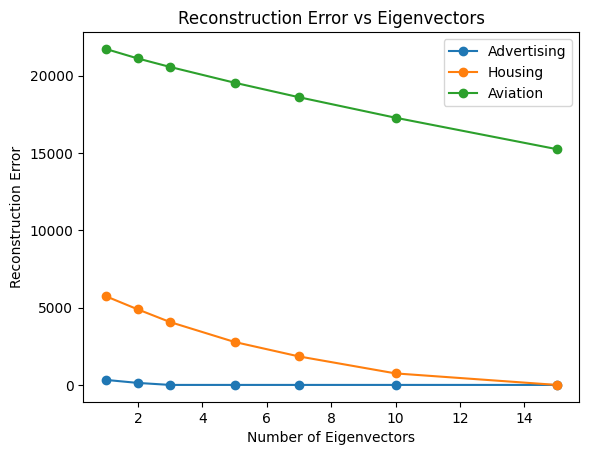

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_list, adv_errors, marker='o', label="Advertising")
plt.plot(n_list, housing_errors, marker='o', label="Housing")
plt.plot(n_list, aviation_errors, marker='o', label="Aviation")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.title("Reconstruction Error vs Eigenvectors")
plt.show()
